In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
import joblib


In [7]:
df= pd.read_csv("data/diabetes.csv")

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [14]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

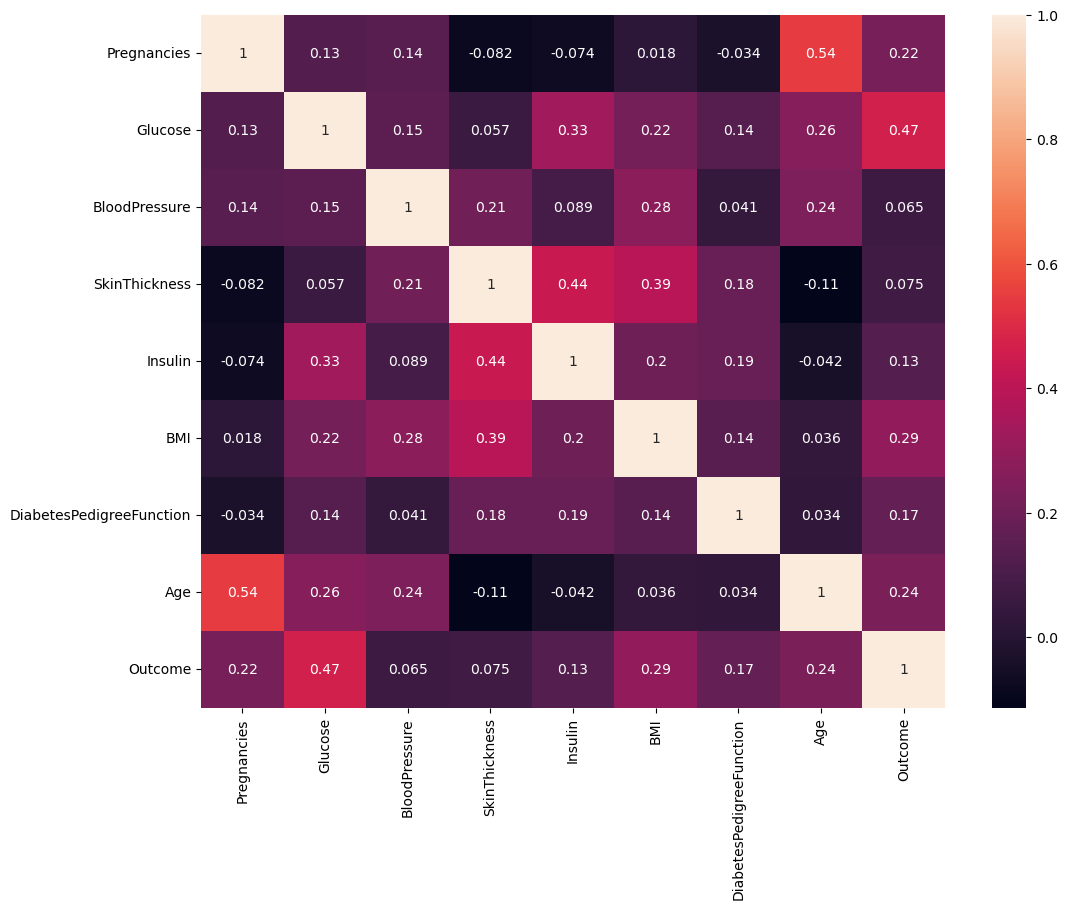

In [15]:
plt.figure(figsize=(12,9))
sns.heatmap(data=df.corr(),annot=True)

In [50]:
df["SkinThickness"]=df["SkinThickness"].replace(0,df["SkinThickness"].mean())

In [51]:
df["Glucose"]=df["Glucose"].replace(0,df["Glucose"].mean())

In [52]:
df["Insulin"]=df["Insulin"].replace(0,df["Insulin"].mean())

In [31]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


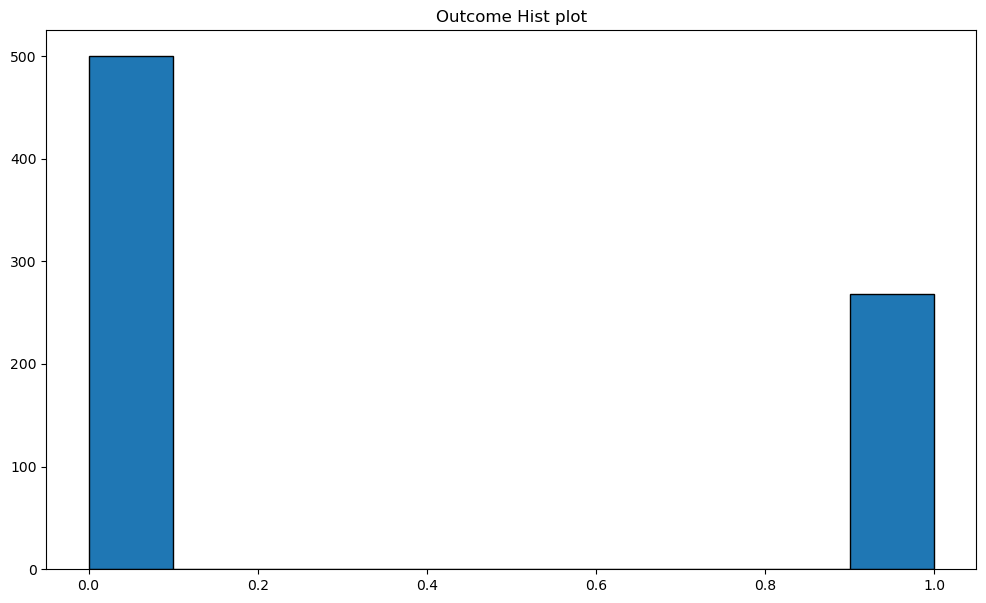

In [32]:
plt.figure(figsize=(12,7))
plt.hist("Outcome",data = df, edgecolor = "k")
plt.title("Outcome Hist plot")
plt.show()

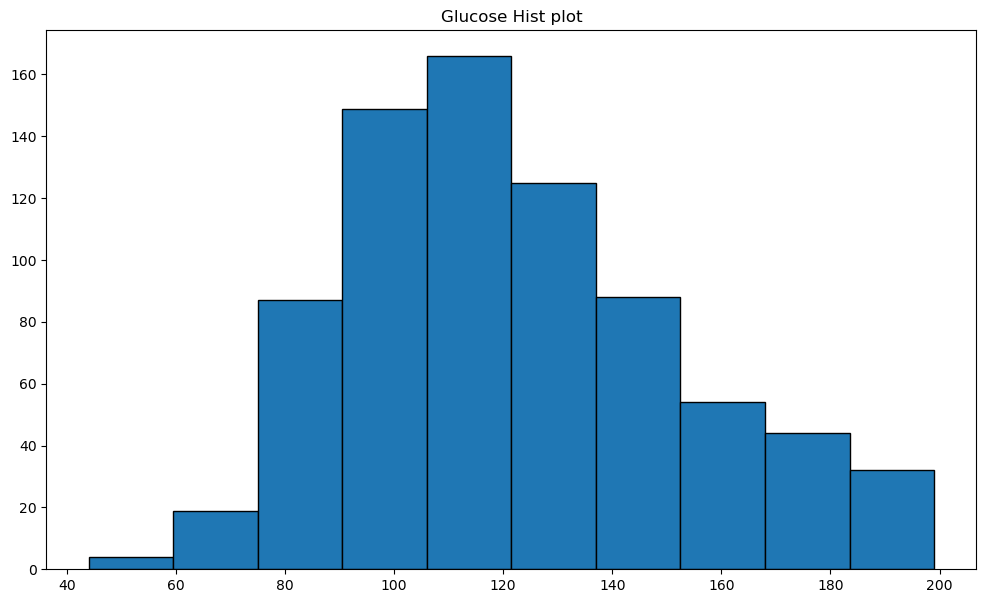

In [33]:
plt.figure(figsize=(12,7))
plt.hist("Glucose",data = df, edgecolor = "k")
plt.title("Glucose Hist plot")
plt.show()

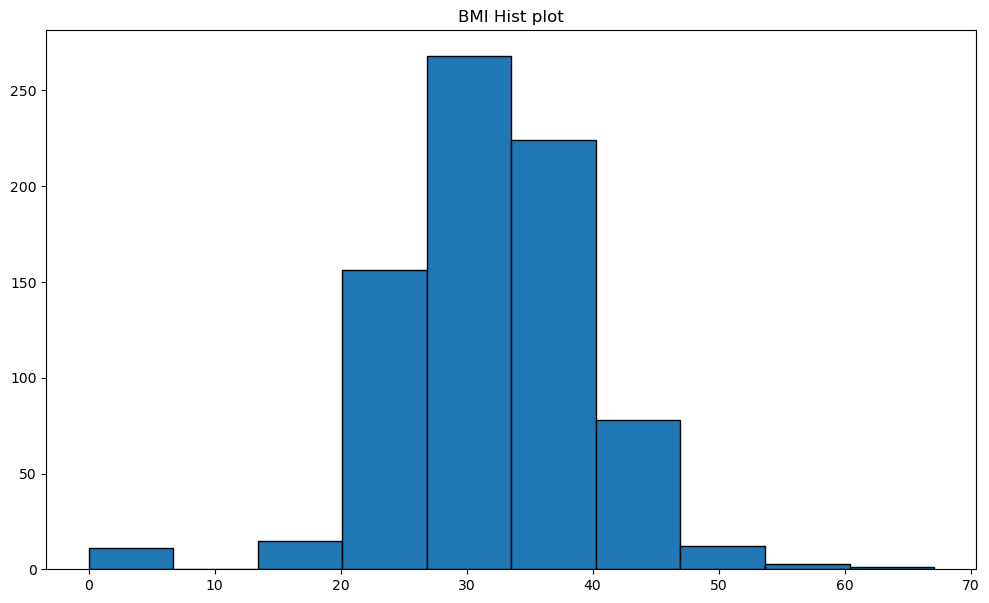

In [34]:
plt.figure(figsize=(12,7))
plt.hist("BMI",data = df, edgecolor = "k")
plt.title("BMI Hist plot")
plt.show()

In [35]:
def remove_outlier(dataFrame):
    for column_name in dataFrame.columns:
        Q1 = dataFrame[column_name].quantile(0.25)
        Q3 = dataFrame[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        print(f"{column_name} >> Lower limit: {lower_limit} \n Upper limit: {upper_limit}")
        dataFrame = dataFrame[(dataFrame[column_name] > lower_limit) & (dataFrame[column_name] < upper_limit)]
    return dataFrame

In [36]:
df=remove_outlier(df)

Pregnancies >> Lower limit: -6.5 
 Upper limit: 13.5
Glucose >> Lower limit: 37.5 
 Upper limit: 201.5
BloodPressure >> Lower limit: 35.0 
 Upper limit: 107.0
SkinThickness >> Lower limit: 8.0 
 Upper limit: 48.0
Insulin >> Lower limit: -118.75 
 Upper limit: 279.25
BMI >> Lower limit: 13.8625 
 Upper limit: 48.96249999999999
DiabetesPedigreeFunction >> Lower limit: -0.29500000000000004 
 Upper limit: 1.145
Age >> Lower limit: 0.0 
 Upper limit: 64.0
Outcome >> Lower limit: -1.5 
 Upper limit: 2.5


In [37]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
5,5,116,74,23,30.5,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,23,30.5,22.5,0.142,33,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [38]:
from sklearn.model_selection import train_test_split
X=df.drop(["Outcome"], axis = 1) 
y=df ["Outcome"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [40]:
X_train.shape

(450, 8)

In [41]:
from sklearn.linear_model import LogisticRegression

In [60]:
logR= LogisticRegression()

In [61]:
logR.fit(X_train,y_train)

C:\Users\Pruthviraj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
logR.score(X_test,y_test)

0.8013245033112583

In [63]:
joblib.dump(logR, "diabetes_model.pkl")

['diabetes_model.pkl']

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
predictions=logR.predict(X_test)

In [66]:
cm= confusion_matrix(y_test, predictions)

In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.71      0.59      0.64        46

    accuracy                           0.80       151
   macro avg       0.77      0.74      0.75       151
weighted avg       0.79      0.80      0.80       151



In [68]:
cm

array([[94, 11],
       [19, 27]], dtype=int64)

<Axes: >

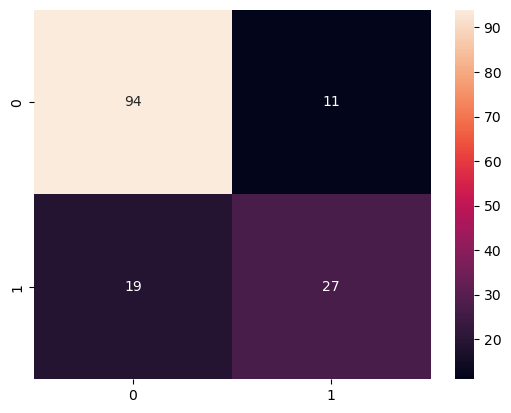

In [69]:
sns.heatmap(cm,annot=True)

In [32]:
df.columns  

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')